# Simple plot
This jupyter notebook shows how to download data from GOES-16 and make a simple plot using the **GOES** package.

Import the packages.

In [1]:
import sys
sys.path.insert(0, '/home/hugo/EUMETCastTools/Python_tests/GOES/GOES-master')

import GOES as GOES
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.feature import NaturalEarthFeature

Downloads the file.

In [2]:
flist = GOES.download('goes16', 'ABI-L2-CMIPF',
                      DateTimeIni = '20200320-203000', DateTimeFin = '20200320-204000', 
                      channel = ['13'], path_out='/home/hugo/Downloads/')

Files:
  OR_ABI-L2-CMIPF-M6C13_G16_s20200802030177_e20200802039497_c20200802039590.nc already exists.


Set the path and name of file that we will use. In this case that information is in flist.

In [5]:
file = flist[0]
print(file)

/home/hugo/Downloads/OR_ABI-L2-CMIPF-M6C13_G16_s20200802030177_e20200802039497_c20200802039590.nc


Gets data from file.

In [6]:
# set the map domain
domain = [-90.0,-60.0,-20.0,2.0]

# reads the file
ds = GOES.open_dataset(file)

# get image with the coordinates of corners of their pixels
CMI, LonCor, LatCor = ds.image('CMI', lonlat='corner', domain=domain)

# get information about data
sat = ds.attribute('platform_ID')
band = ds.variable('band_id').data[0]

Creates plot.

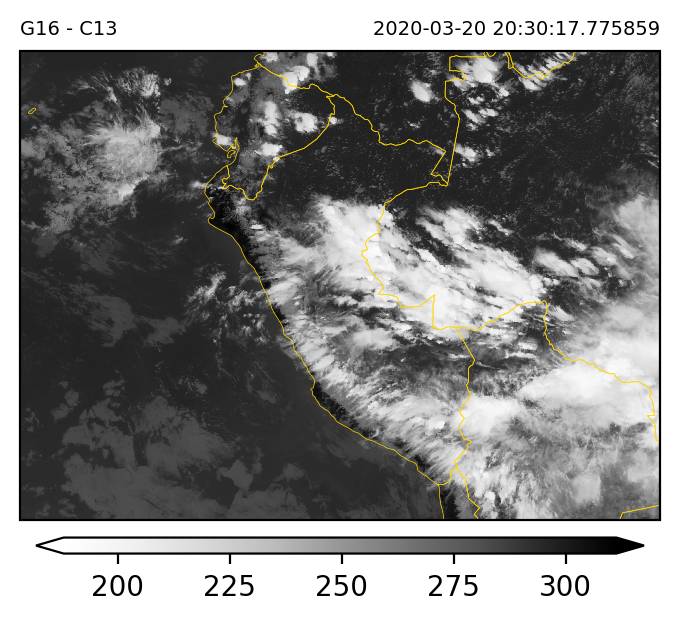

In [7]:
# calculates the central longitude of the plot
lon_cen = 360.0+(domain[0]+domain[1])/2.0

# creates the figure
fig = plt.figure('map', figsize=(4,4), dpi=200)
ax = fig.add_axes([0.1, 0.16, 0.80, 0.75], projection=ccrs.PlateCarree(lon_cen))
#ax.outline_patch.set_linewidth(0.3)

# add the geographic boundaries
l = NaturalEarthFeature(category='cultural', name='admin_0_countries', scale='50m', facecolor='none')
ax.add_feature(l, edgecolor='gold', linewidth=0.25)

# plot the data
img = ax.pcolormesh(LonCor.data, LatCor.data, CMI.data, cmap=plt.cm.Greys, transform=ccrs.PlateCarree())

# add the colorbar
cb = plt.colorbar(img, orientation='horizontal', extend='both', cax=fig.add_axes([0.12, 0.2, 0.76, 0.02]))

# set the title
ax.set_title('{} - C{}'.format(sat, band), fontsize=7, loc='left')
ax.set_title(CMI.time_bounds.data[0], fontsize=7, loc='right')

# set the map limits
ax.set_extent([domain[0]+360.0, domain[1]+360.0, domain[2], domain[3]], crs=ccrs.PlateCarree())

plt.show()